In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torchvision
import torch.nn.functional as F
from torch import nn
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

import sys
sys.path.append('..')

from src.beam import beam_arguments, Experiment
from src.beam import UniversalDataset, UniversalBatchSampler
from src.beam import Algorithm
from src.beam import LinearNet

from src.beam import DataTensor
from src.beam.utils import is_notebook

from deep_tsne_example import DeepTSNE, MNISTDataset, get_deep_tsne_parser

In [ ]:
path_to_data = '/home/shared/data//dataset/mnist'
root_dir = '/home/shared/data/results'

args = beam_arguments(get_deep_tsne_parser(),
    f"--project-name=deep_tsne_mnist --root-dir={root_dir} --identifier=regularization --algorithm=DeepTSNE --device=0 --batch-size=256 --override",
    "--epoch-length=400000 --n-epochs=10 --reduction=sum", path_to_data=path_to_data)

experiment = Experiment(args)
alg = experiment.fit(DeepTSNE, MNISTDataset)

2022-07-18 14:56:14 | INFO | Deleting old experiment
2022-07-18 14:56:14 | INFO | Experiment directory is: /home/shared/data/results/deep_tsne_mnist/DeepTSNE/regularization/0000_20220718_145614
2022-07-18 14:56:14 | INFO | beam project: deep_tsne_mnist
2022-07-18 14:56:14 | INFO | Experiment Hyperparameters
2022-07-18 14:56:14 | INFO | project_name: deep_tsne_mnist
2022-07-18 14:56:14 | INFO | algorithm: DeepTSNE
2022-07-18 14:56:14 | INFO | identifier: regularization
2022-07-18 14:56:14 | INFO | mp_port: random
2022-07-18 14:56:14 | INFO | root_dir: /home/shared/data/results
2022-07-18 14:56:14 | INFO | reload: False
2022-07-18 14:56:14 | INFO | resume: -1
2022-07-18 14:56:14 | INFO | override: True
2022-07-18 14:56:14 | INFO | cpu_workers: 0
2022-07-18 14:56:14 | INFO | device: 0
2022-07-18 14:56:14 | INFO | parallel: 1
2022-07-18 14:56:14 | INFO | tensorboard: True
2022-07-18 14:56:14 | INFO | lognet: True
2022-07-18 14:56:14 | INFO | deterministic: False
2022-07-18 14:56:14 | INFO 

train:   3%|3         | 48/1561 [00:00<?, ?it/s]

validation:   5%|4         | 76/1561 [00:00<?, ?it/s]

2022-07-18 14:56:56 | INFO | 
2022-07-18 14:56:56 | INFO | Finished epoch 1/10:
2022-07-18 14:56:56 | INFO | train:
2022-07-18 14:56:56 | INFO | seconds:  18.54 | batches:  1.561e+03 | samples:  3.996e+05 | batch_rate:  84.2 [iter/sec] | sample_rate:  2.156e+04 [iter/sec] 
2022-07-18 14:56:56 | INFO | loss:        | avg: 897.5     | std: 60.29     | min: 876.5     | 25%: 888.5     | 50%: 892.6     | 75%: 897.7     | max: 2.843e+03 
2022-07-18 14:56:56 | INFO | loss_reg:    | avg: 1.894     | std: 0.1007    | min: 1.58      | 25%: 1.859     | 50%: 1.889     | 75%: 1.921     | max: 4.945     
2022-07-18 14:56:56 | INFO | loss_dist:   | avg: 139.9     | std: 32.75     | min: 96.68     | 25%: 125.8     | 50%: 136.7     | 75%: 148.9     | max: 864.9     
2022-07-18 14:56:56 | INFO | mu:          | avg: 0.0005827 | std: 0.01036   | min:-0.03157   | 25%:-0.005668  | 50%: 6.784e-05 | 75%: 0.006408  | max: 0.08923   
2022-07-18 14:56:56 | INFO | sig2:        | avg: 0.02412   | std: 0.002569  | 

train:   4%|4         | 63/1561 [00:00<?, ?it/s]

In [33]:
predictions = alg.evaluate('test')

ERROR! Session/line number was not unique in database. History logging moved to new session 301


In [19]:
z = predictions.data['z']
y = predictions.data['y']

In [20]:
import matplotlib.pyplot as plt

In [23]:
y = y.detach().cpu().numpy()

In [22]:
z = z.detach().cpu().numpy()

In [ ]:
fig, ax = plt.subplots()
sc = ax.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')

size = 30
lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), ms=np.sqrt(size), mec="none",
                        label="{:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.arange(10)]
plt.legend(handles=handles)

ax.grid(True)

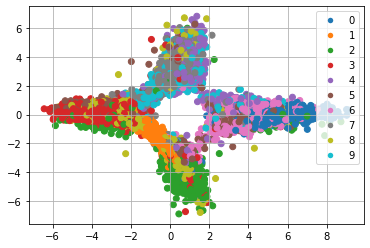

In [32]:
fig, ax = plt.subplots()
sc = ax.scatter(z[:, 0], z[:, 1], c=y, cmap='tab10')

size = 30
lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), ms=np.sqrt(size), mec="none",
                        label="{:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.arange(10)]
plt.legend(handles=handles)

ax.grid(True)